In [58]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Download the dataset
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

# List files to find the CSV
print("Files in dataset directory:", os.listdir(path))

# Assuming the dataset contains a CSV file named 'healthcare-dataset-stroke-data.csv'
csv_path = os.path.join(path, 'healthcare-dataset-stroke-data.csv')

# Load into DataFrame
stroke = pd.read_csv(csv_path)

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1
Files in dataset directory: ['healthcare-dataset-stroke-data.csv']


In [60]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [61]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [62]:
stroke.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [63]:
# Impute missing BMI values with the median
stroke['bmi'].fillna(stroke['bmi'].median(), inplace=True)
stroke = stroke.drop('id', axis=1)

<ipython-input-63-16df86f91df8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke['bmi'].fillna(stroke['bmi'].median(), inplace=True)


In [64]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **EDA (data visualization)**

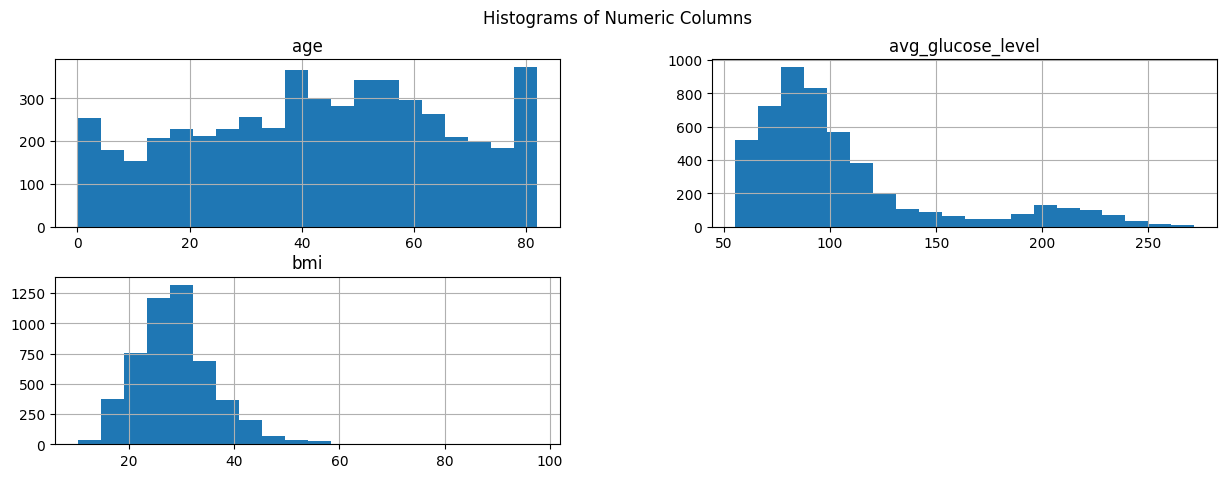

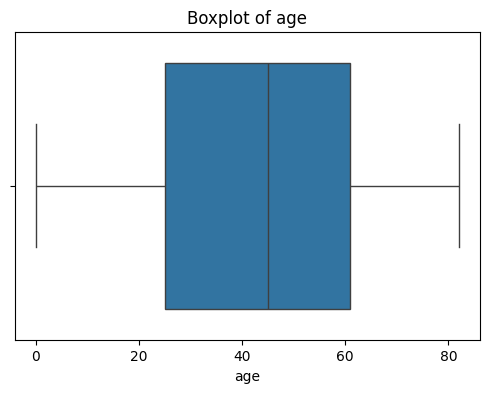

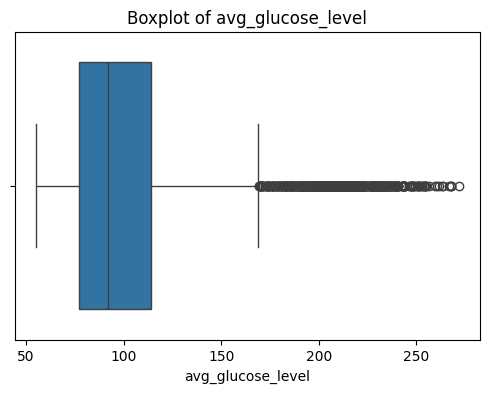

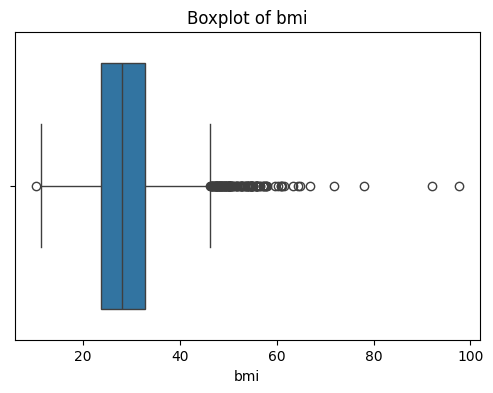

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
stroke[numeric_columns].hist(bins=20, figsize=(15, 5))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

# Boxplots for numeric columns to detect outliers
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=stroke[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


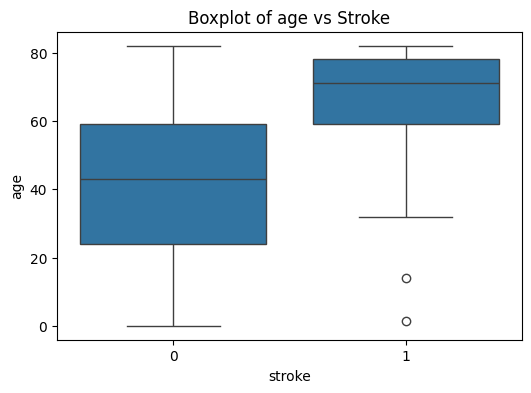

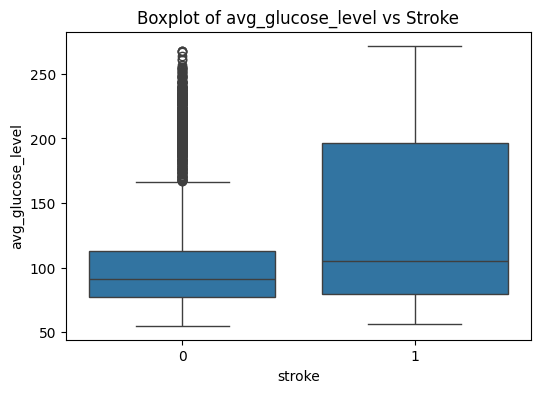

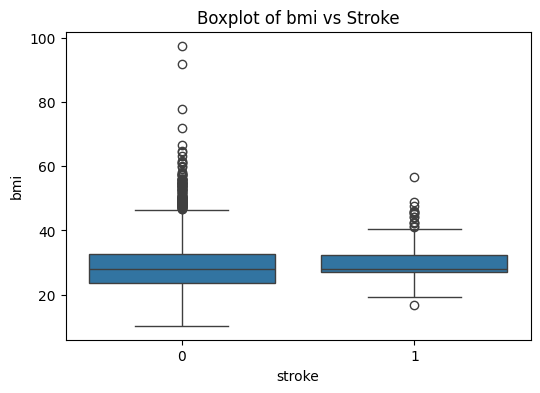

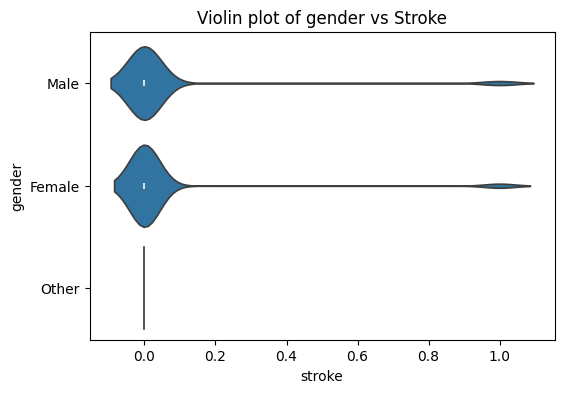

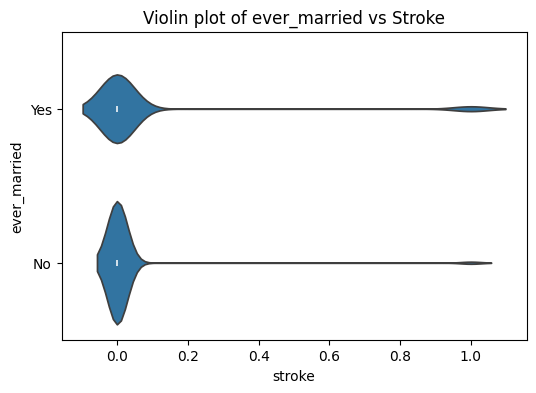

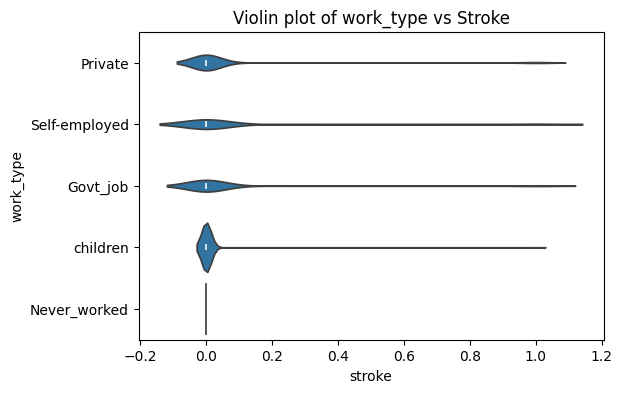

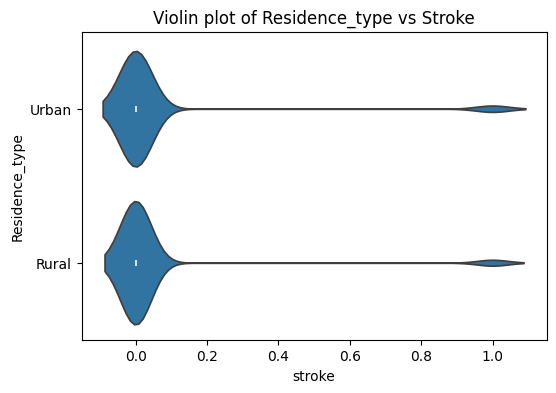

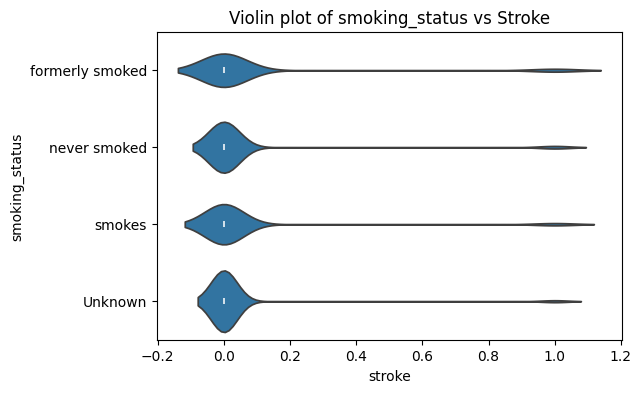

In [66]:
# Boxplot for stroke vs numeric columns (age, bmi, avg_glucose_level)
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=col, data=stroke)
    plt.title(f"Boxplot of {col} vs Stroke")
    plt.show()

# Violin plots for stroke vs categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='stroke', y=col, data=stroke)
    plt.title(f"Violin plot of {col} vs Stroke")
    plt.show()


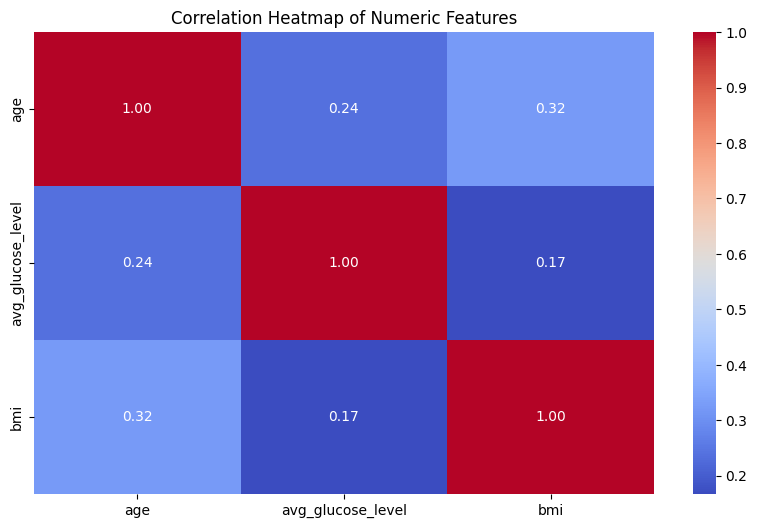

In [67]:
# Correlation heatmap of numeric columns
corr_matrix = stroke[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


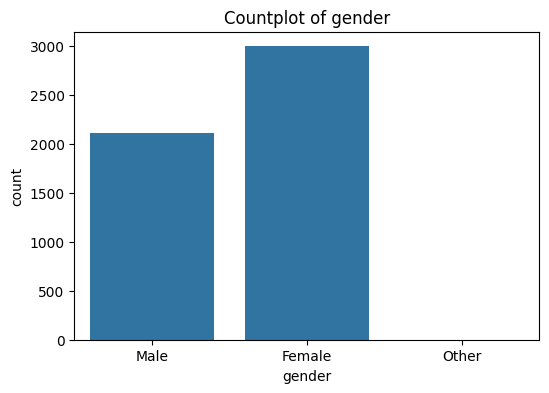

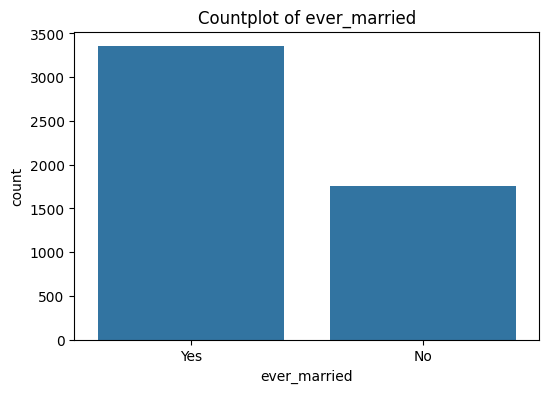

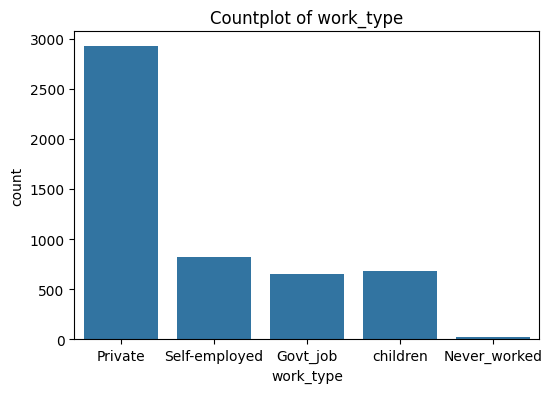

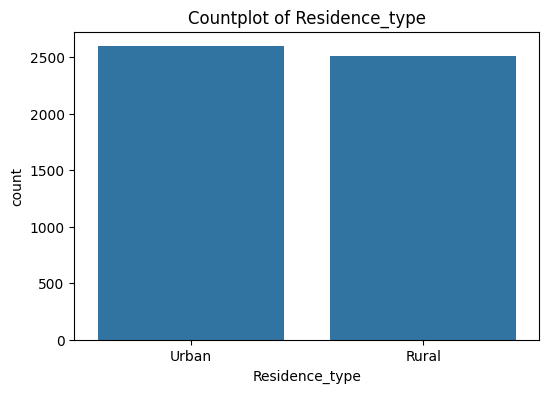

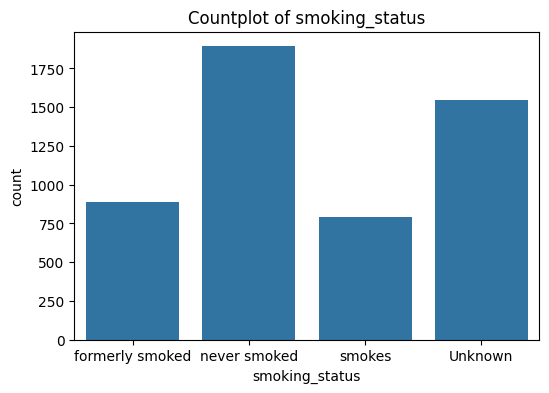

In [68]:
# Count plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=stroke)
    plt.title(f"Countplot of {col}")
    plt.show()


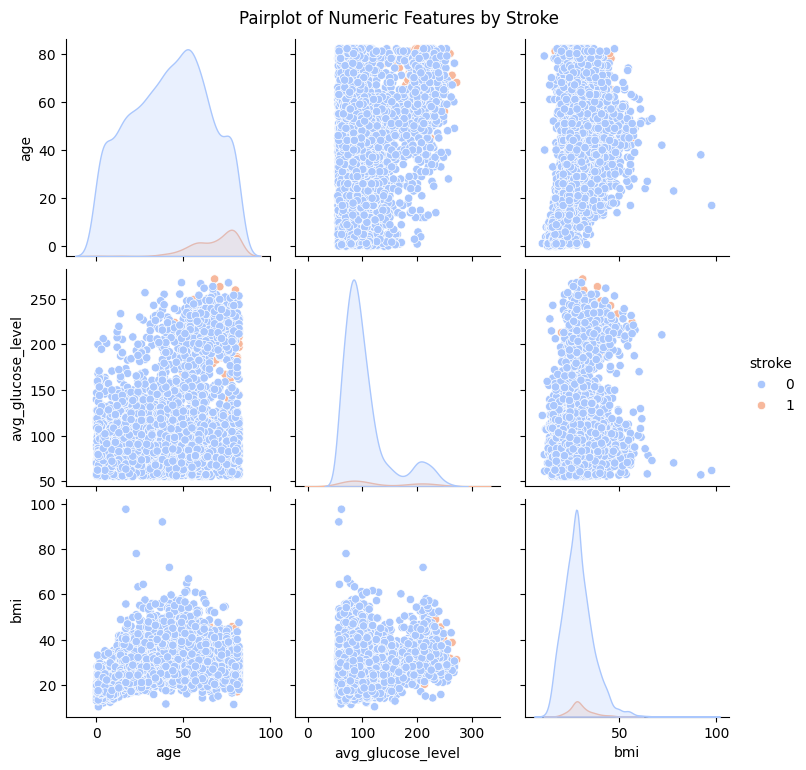

In [69]:
# Pairplot to see relationships between numeric columns and stroke
sns.pairplot(stroke, hue="stroke", vars=numeric_columns, diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Numeric Features by Stroke", y=1.02)
plt.show()


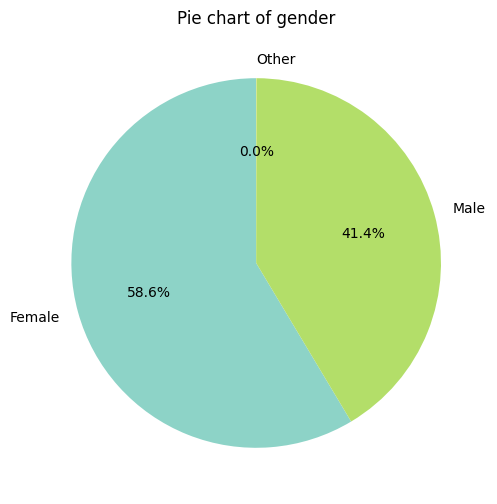

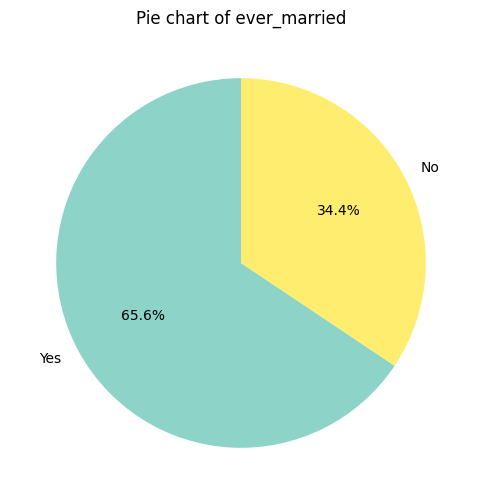

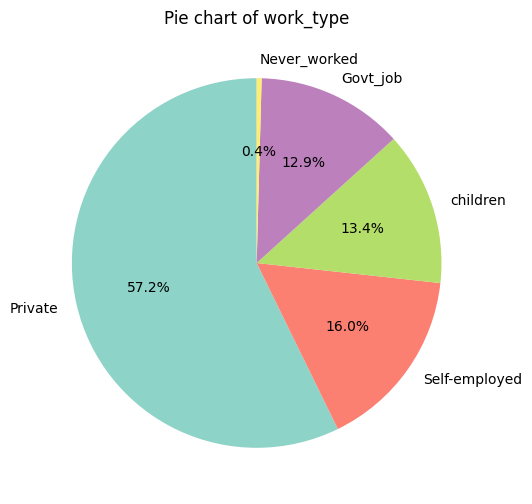

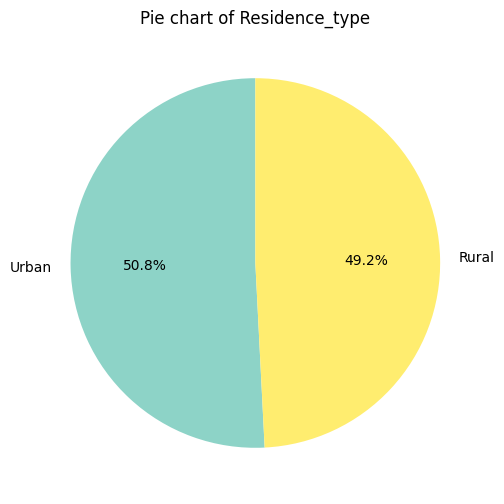

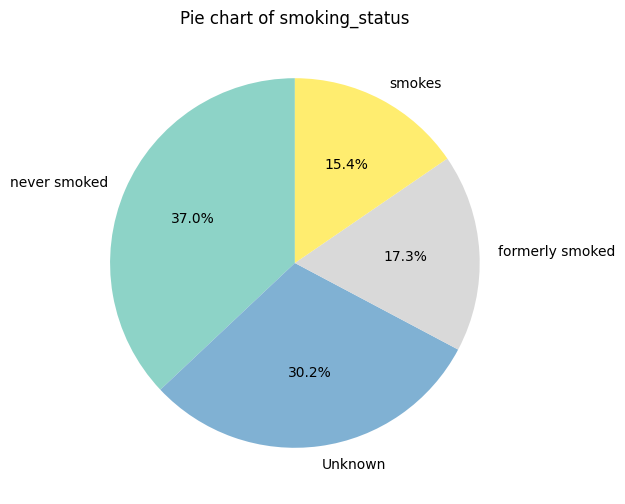

In [70]:
# Pie charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    stroke[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
    plt.title(f"Pie chart of {col}")
    plt.ylabel("")
    plt.show()


# **Label Encoding:**

In [71]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply LabelEncoder to each of the columns
for column in columns_to_encode:
    stroke[column] = le.fit_transform(stroke[column])



In [72]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize (zero mean, unit variance)
# scaler = StandardScaler()
# stroke[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke[['age', 'avg_glucose_level', 'bmi']])


# Or use Min-Max Scaling to scale values between 0 and 1
scaler = MinMaxScaler()
stroke[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke[['age', 'avg_glucose_level', 'bmi']])

In [74]:
stroke.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,0.526692,0.097456,0.054012,0.656164,2.167710,0.508023,0.235563,0.212624,1.376908,0.048728
std,0.493044,0.276033,0.296607,0.226063,0.475034,1.090293,0.499985,0.209046,0.088197,1.071534,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,2.000000,0.000000,0.102137,0.154639,0.000000,0.000000
50%,0.000000,0.548340,0.000000,0.000000,1.000000,2.000000,1.000000,0.169721,0.203895,2.000000,0.000000
75%,1.000000,0.743652,0.000000,0.000000,1.000000,3.000000,1.000000,0.272228,0.257732,2.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000


# Using Z-Score Method (for normally distributed data)-Outliers handle

In [75]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named 'stroke'
# Select all numeric columns (float64 and int64 types)
numeric_columns = stroke.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(stroke[numeric_columns]))

# Define a threshold (commonly 3)
threshold = 3

# Identify outliers for all columns where Z-score > threshold
outliers = (z_scores > threshold)

# Get rows where there are any outliers
outlier_rows = stroke[(outliers).any(axis=1)]

# Remove rows with outliers
df_no_outliers = stroke[~(outliers).any(axis=1)]

print("Outliers detected:", outlier_rows)
print("Data without outliers:", df_no_outliers)


Outliers detected:       gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.816895             0              1             1          2   
1          0  0.743652             0              0             1          3   
2          1  0.975586             0              1             1          2   
3          0  0.597168             0              0             1          2   
4          0  0.963379             1              0             1          3   
...      ...       ...           ...            ...           ...        ...   
5088       0  0.780273             1              0             1          3   
5091       1  0.719238             1              0             1          2   
5093       0  0.548340             1              0             1          0   
5100       1  1.000000             1              0             1          3   
5105       0  0.975586             1              0             1          2   

      Residence_type

# Split Data

In [76]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = stroke.drop('stroke', axis=1)
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Predictions and Evaluation

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9393346379647749
Confusion Matrix:
 [[960   0]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Train Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Predictions and Evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9393346379647749
Confusion Matrix:
 [[960   0]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
import xgboost as xgb

# Train XGBoost
xg_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xg_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = xg_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9383561643835616
Confusion Matrix:
 [[954   6]
 [ 57   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.45      0.08      0.14        62

    accuracy                           0.94      1022
   macro avg       0.70      0.54      0.55      1022
weighted avg       0.91      0.94      0.92      1022

